In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

In [2]:
df = pd.read_csv('Mall_Data.csv', index_col=0)
df

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


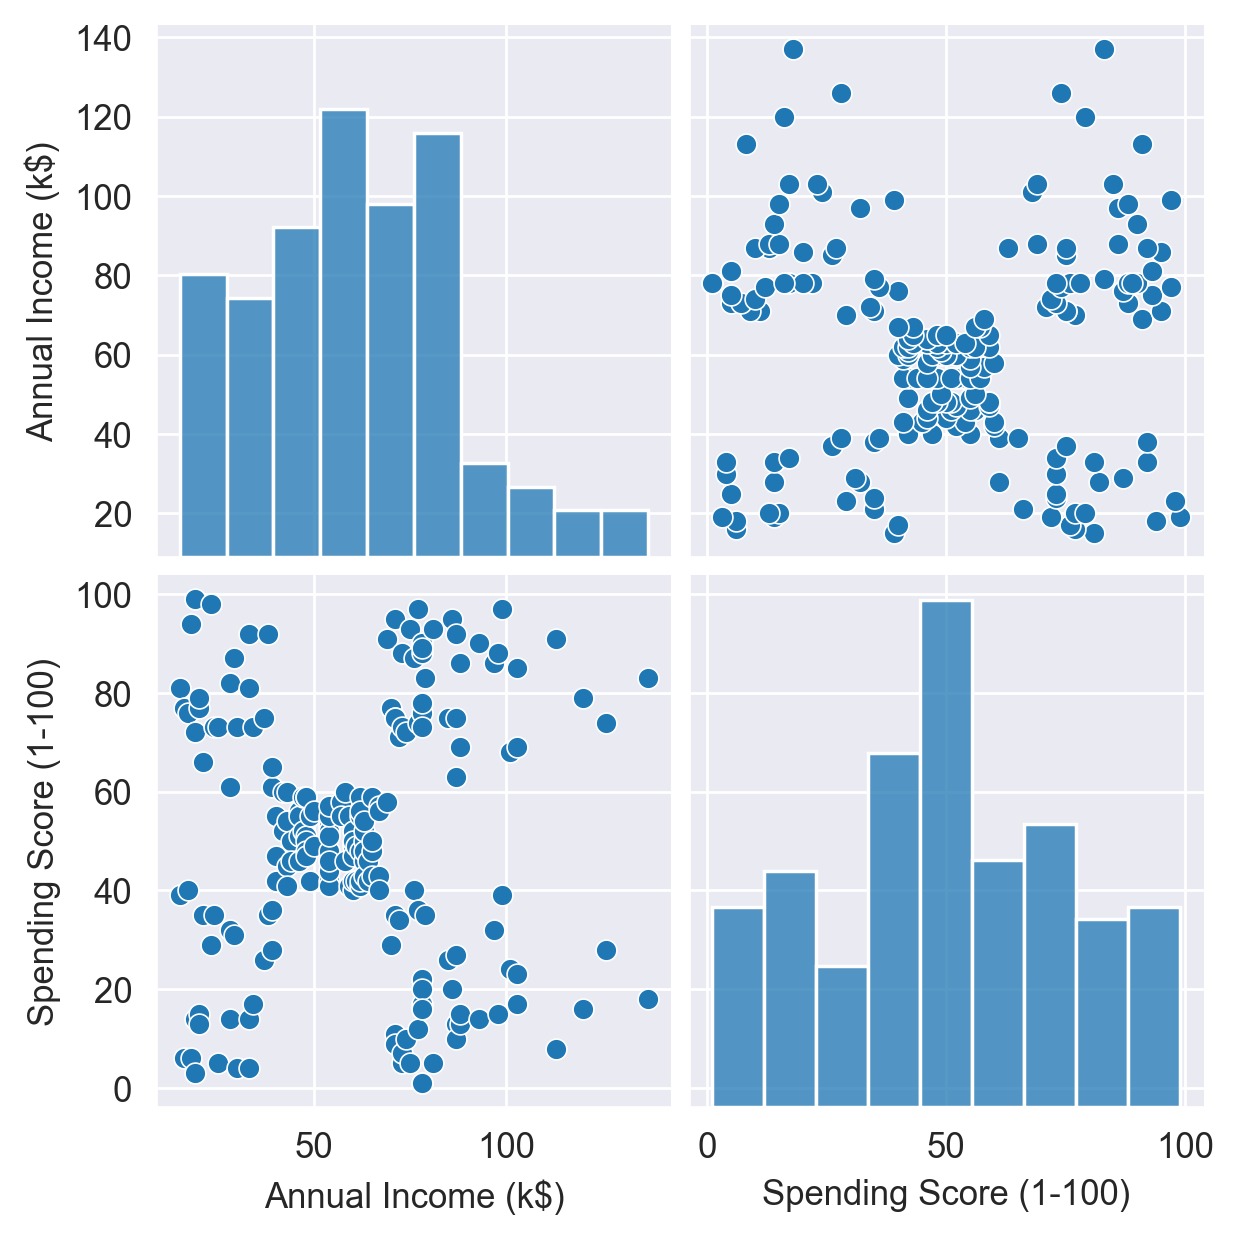

In [3]:
sns.pairplot(df)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

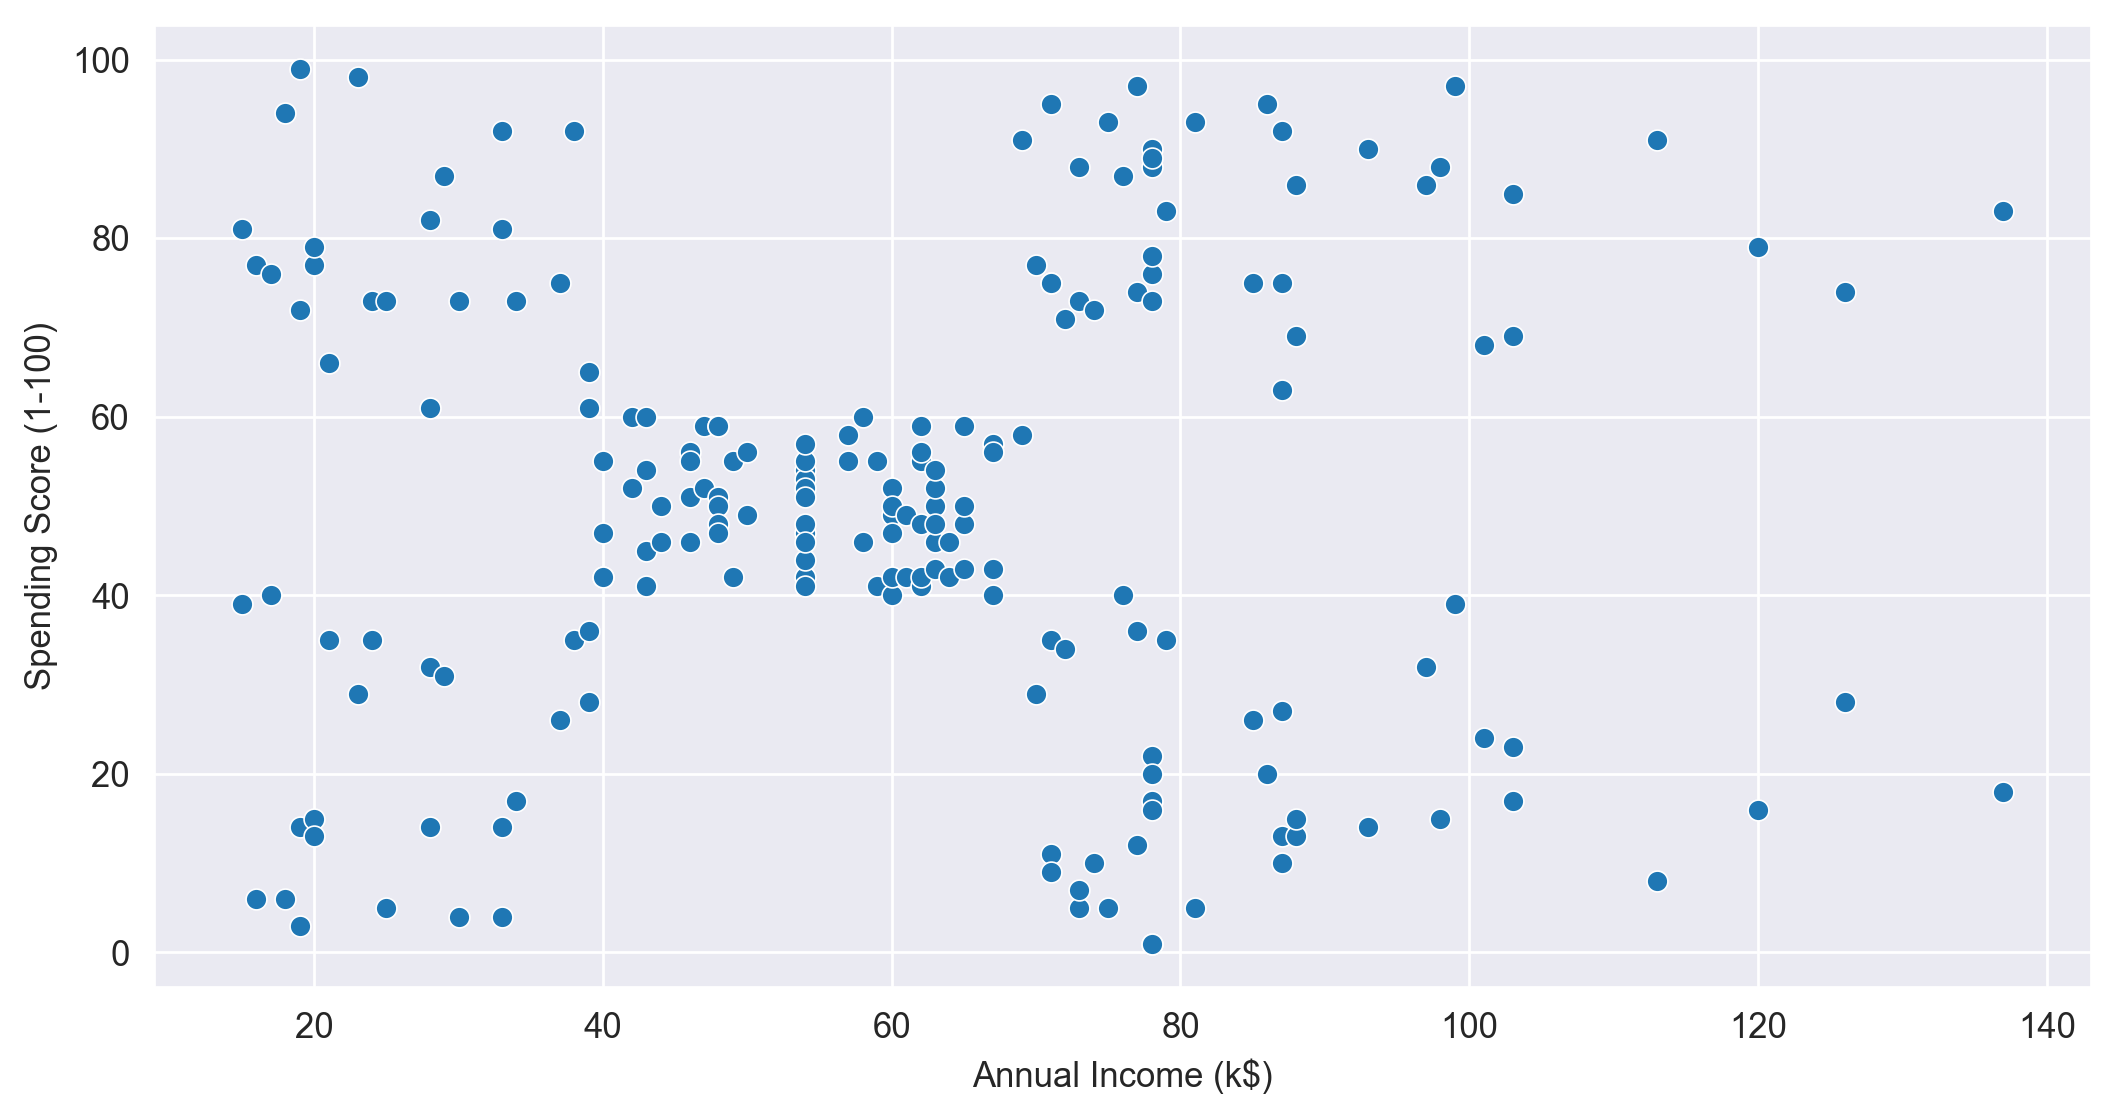

In [4]:
sns.scatterplot(df['Annual Income (k$)'], df['Spending Score (1-100)'])

In [5]:
sc = StandardScaler()
x = sc.fit_transform(df)
x

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [6]:
km = KMeans()
y = km.fit_predict(x)
y

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 5, 5,
       0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 3, 3, 5, 5, 5, 5,
       5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7,
       6, 7])

In [7]:
d1 = pd.DataFrame(x, columns=df.columns)
d1['cluster'] = y
d1

,Annual Income (k$),Spending Score (1-100),cluster
0,-1.738999,-0.434801,0
1,-1.738999,1.195704,4
2,-1.700830,-1.715913,0
3,-1.700830,1.040418,4
4,-1.662660,-0.395980,0
...,...,...,...
195,2.268791,1.118061,7
196,2.497807,-0.861839,6
197,2.497807,0.923953,7
198,2.917671,-1.250054,6


In [8]:
km.cluster_centers_

array([[-1.32954532, -1.16358805],
       [ 0.66703804,  1.23036618],
       [ 0.7489536 , -1.45651437],
       [ 0.1206509 , -0.15673077],
       [-1.35366972,  1.15873115],
       [-0.49804891,  0.06175337],
       [ 1.87564575, -1.09476801],
       [ 1.81769762,  1.26275949]])

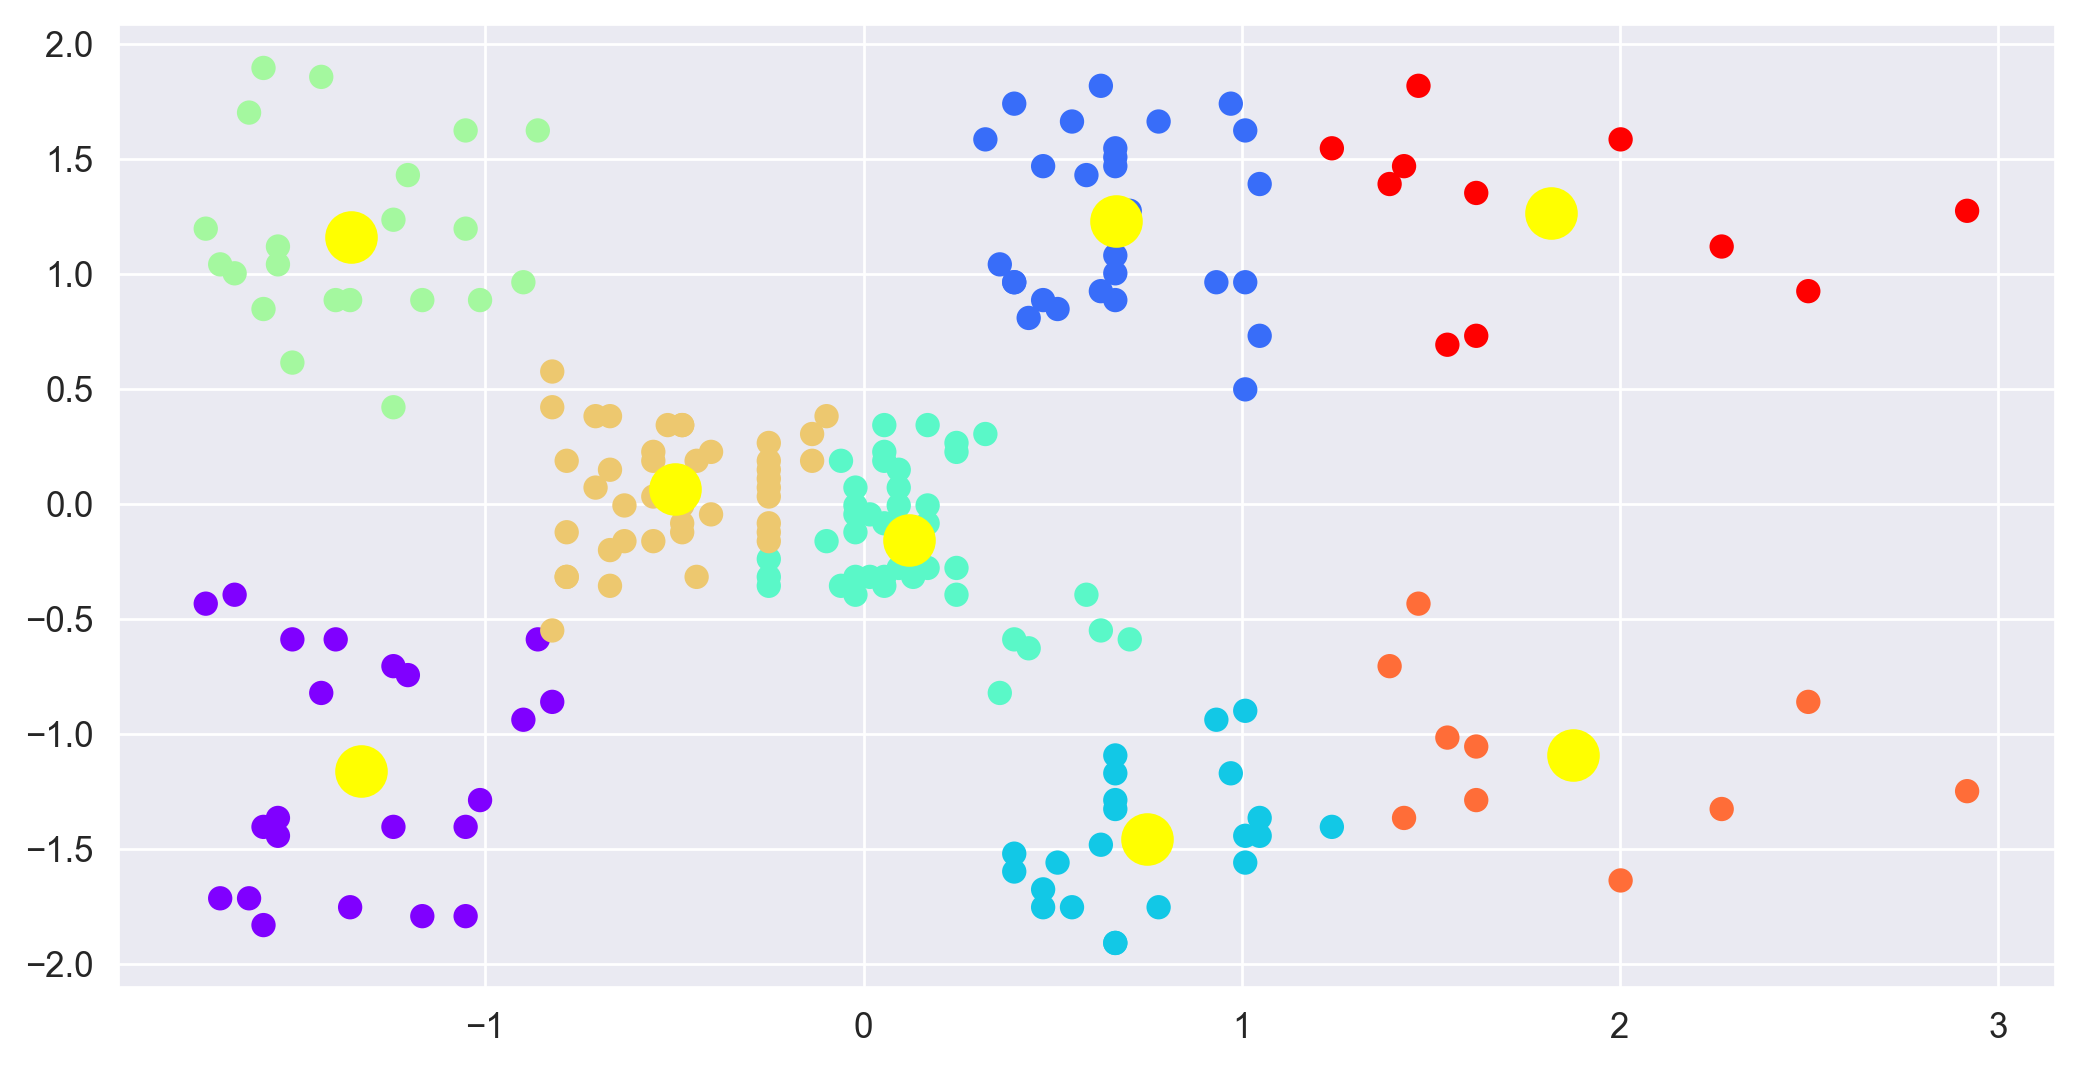

In [9]:
plt.scatter(d1.iloc[:,0],d1.iloc[:,1], c = d1['cluster'], cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = 'yellow', s = 200)

# Elbow graph 

In [10]:
wcss = []

for i in range(1,21):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [11]:
wcss

[400.0,
 269.1425070447921,
 157.70400815035947,
 108.92131661364357,
 65.56840815571681,
 55.057348270386,
 44.91118554999014,
 37.254134866506845,
 33.9217156556756,
 29.115564557545753,
 26.088685342599888,
 23.56726538471703,
 21.68426327903017,
 19.46719946323718,
 17.264898963433854,
 16.018892315286216,
 14.843840234902812,
 13.8401712036658,
 12.773824585759307,
 12.022545035126068]

Text(0, 0.5, 'WCSS')

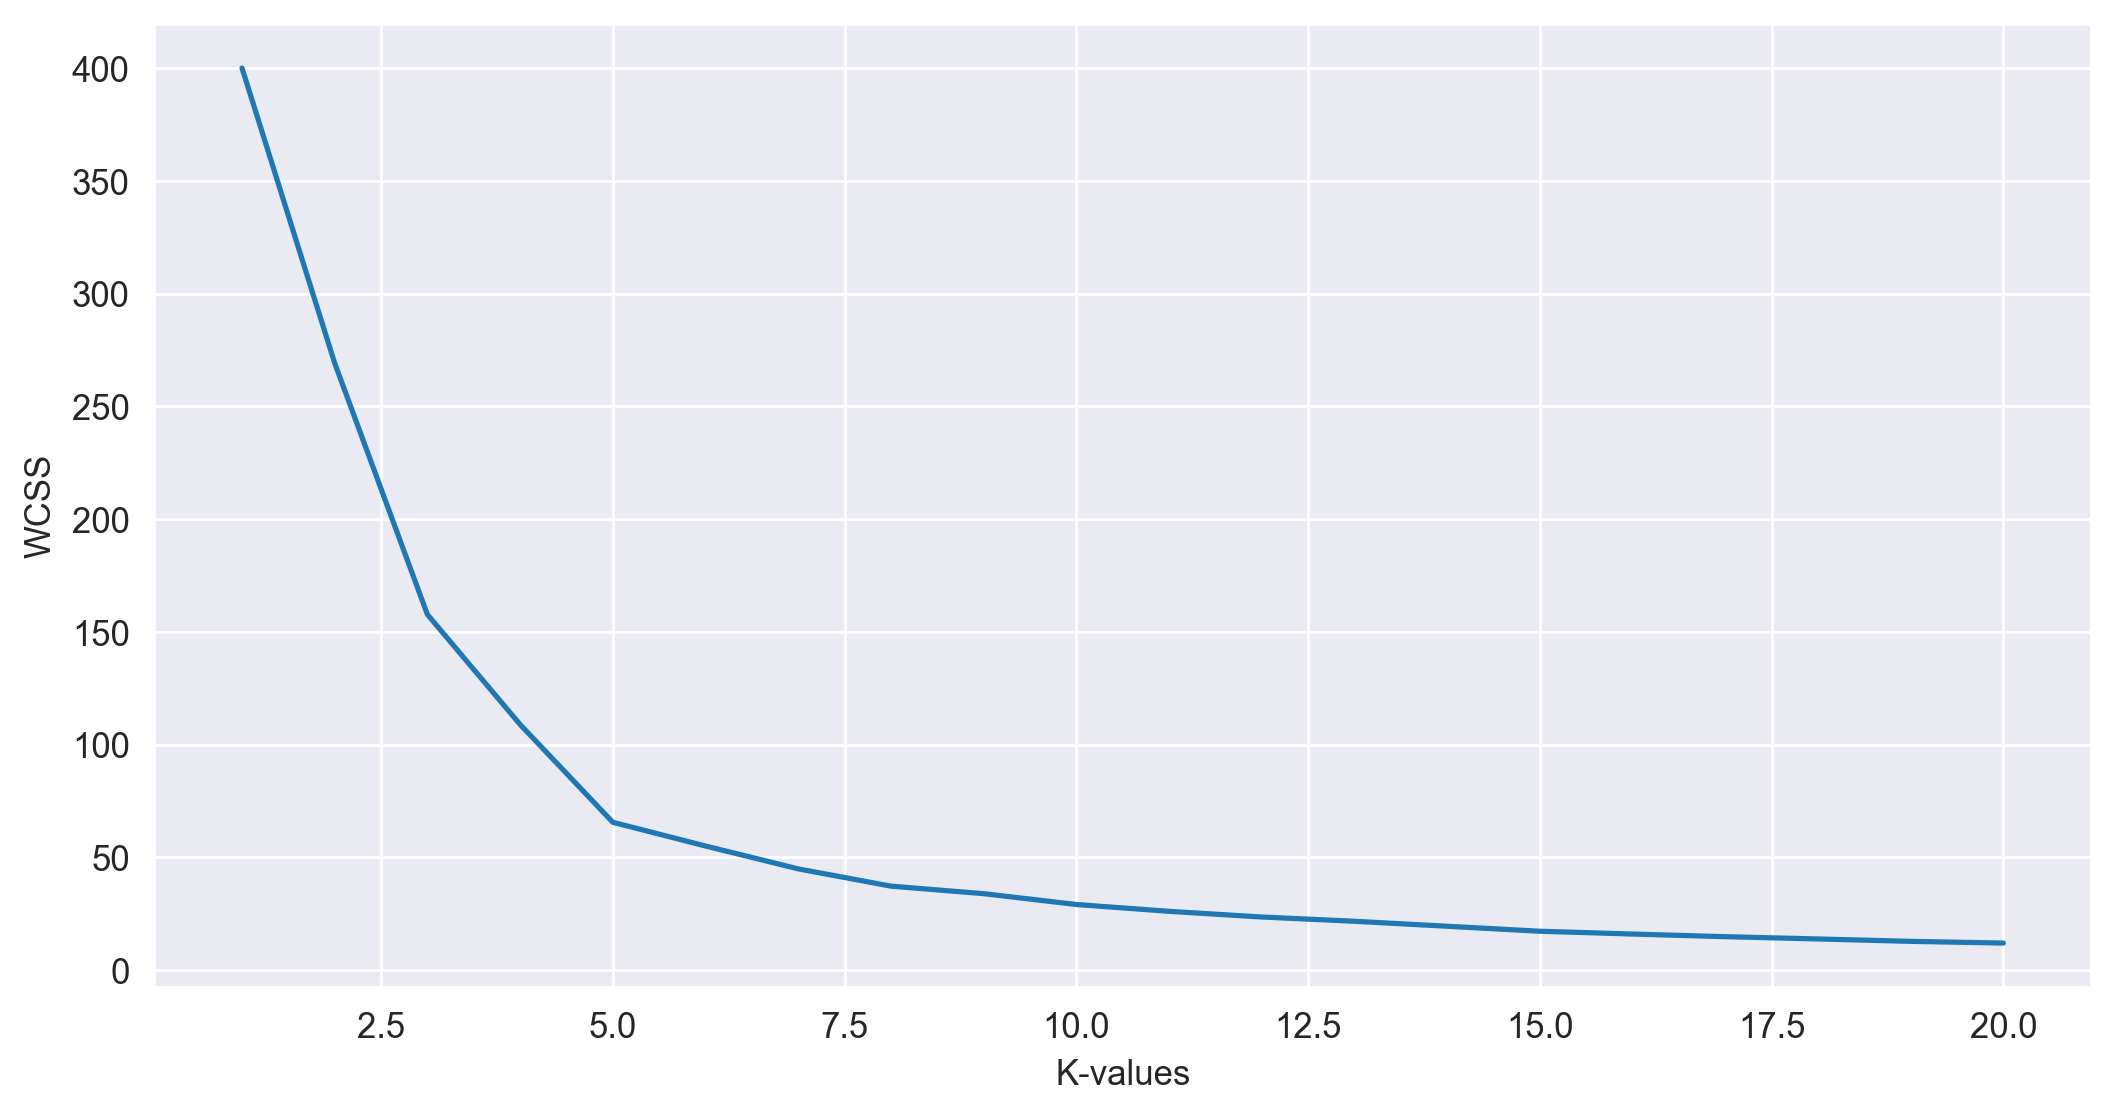

In [12]:
plt.plot(range(1,21), wcss)
plt.xlabel('K-values')
plt.ylabel('WCSS')

# Final Model

In [13]:
km = KMeans(n_clusters=5)
y = km.fit_predict(x)
y

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0,
       1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 4, 0, 4, 2, 4, 2, 4,
       0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4])

In [14]:
df['cluster'] = y

In [15]:
df

,Annual Income (k$),Spending Score (1-100),cluster
CustomerID,,,
1,15,39,1
2,15,81,3
3,16,6,1
4,16,77,3
5,17,40,1
...,...,...,...
196,120,79,4
197,126,28,2
198,126,74,4


In [16]:
df.groupby('cluster').agg('mean')

,Annual Income (k$),Spending Score (1-100)
cluster,,
0,55.296296,49.518519
1,26.304348,20.913043
2,88.200000,17.114286
3,25.727273,79.363636
4,86.538462,82.128205


In [17]:
data = pd.DataFrame(x, columns=['Annual Income','Spending Score'])
data

,Annual Income,Spending Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


In [18]:
km.cluster_centers_

array([[-0.20091257, -0.02645617],
       [-1.30751869, -1.13696536],
       [ 1.05500302, -1.28443907],
       [-1.32954532,  1.13217788],
       [ 0.99158305,  1.23950275]])

In [19]:
data['cluster'] = y

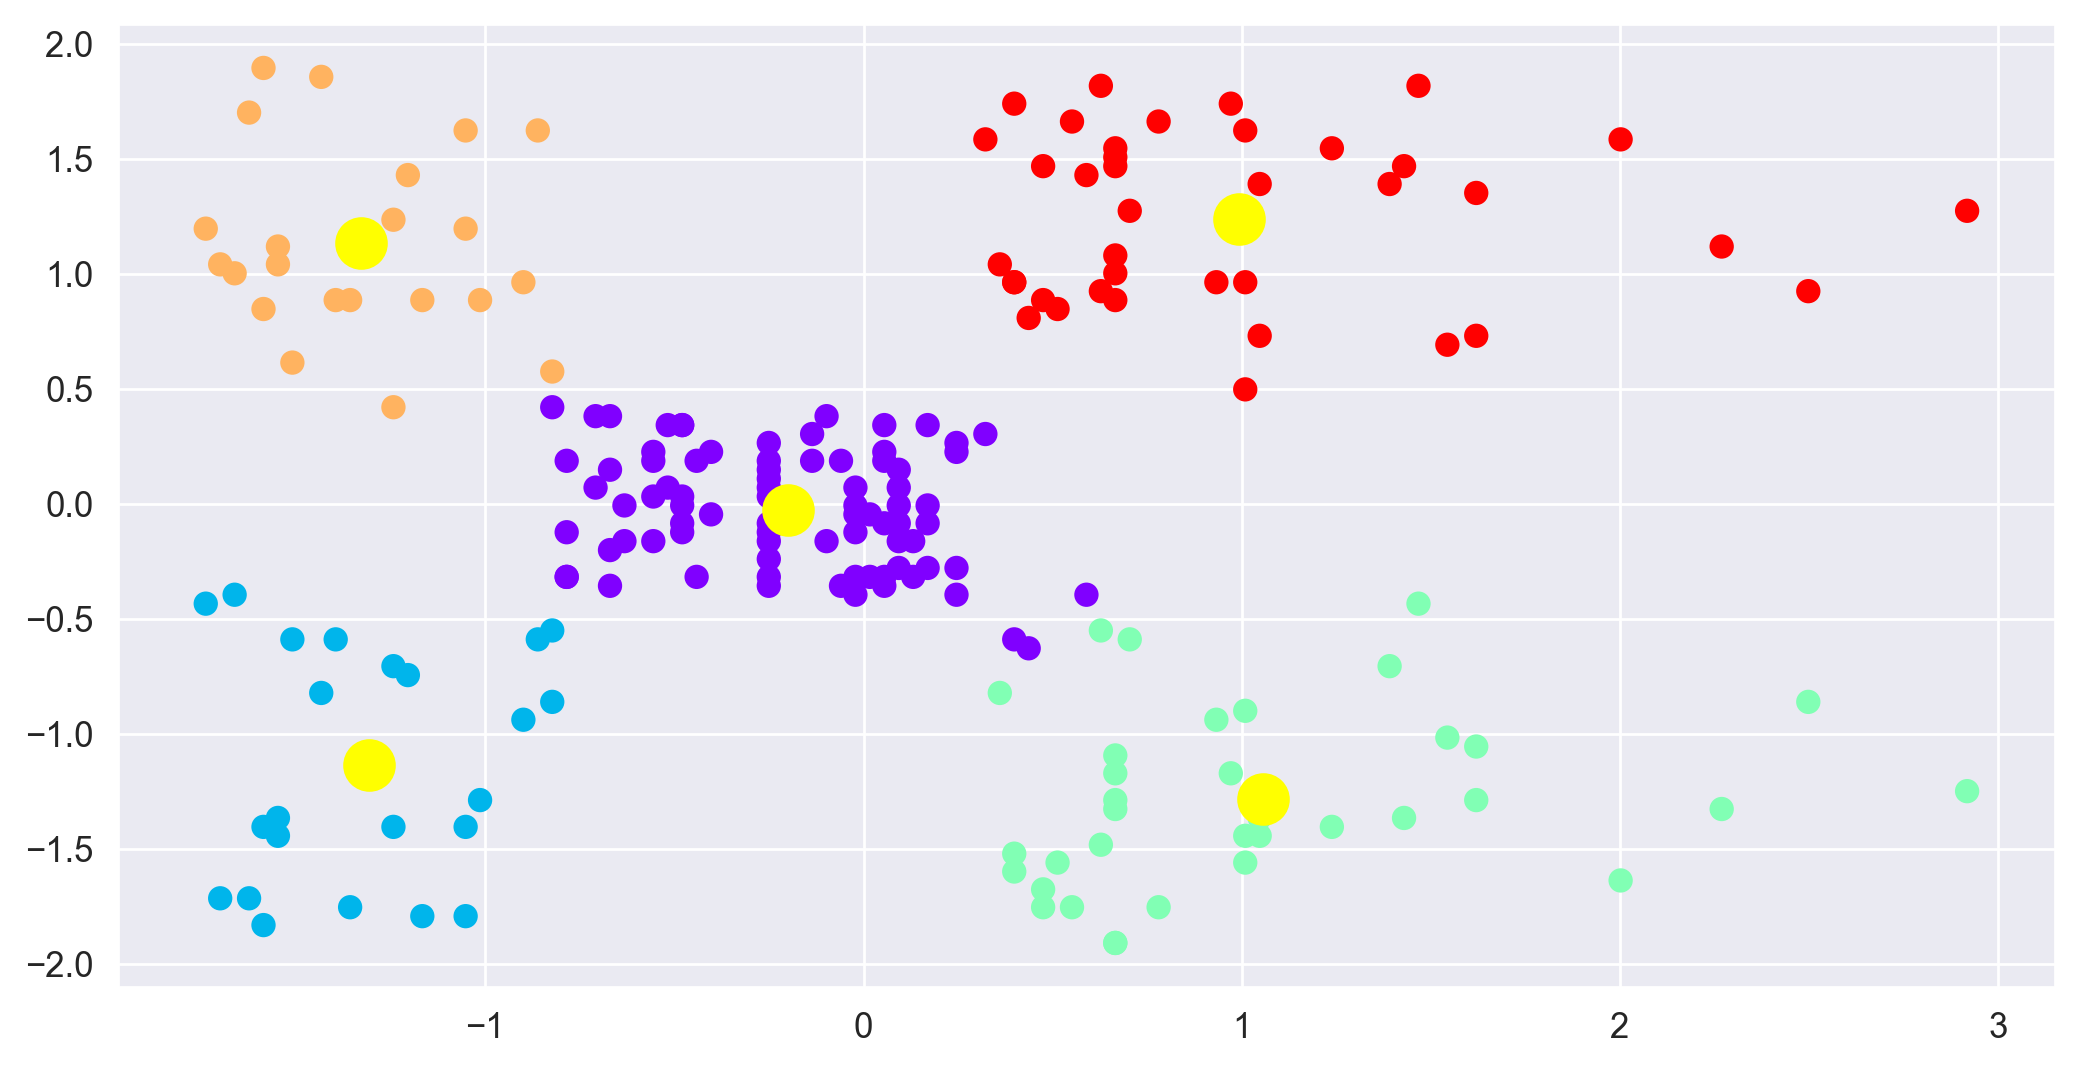

In [20]:
plt.scatter(data['Annual Income'], data['Spending Score'], c = data['cluster'],cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], s = 200, c = 'yellow')

# Evaluation of KMEANS

In [21]:
from sklearn.metrics import silhouette_score

In [22]:
silhouette_score(x,y)

0.5546571631111091

In [23]:
#!pip install yellowbrick

In [24]:
from yellowbrick.cluster import SilhouetteVisualizer

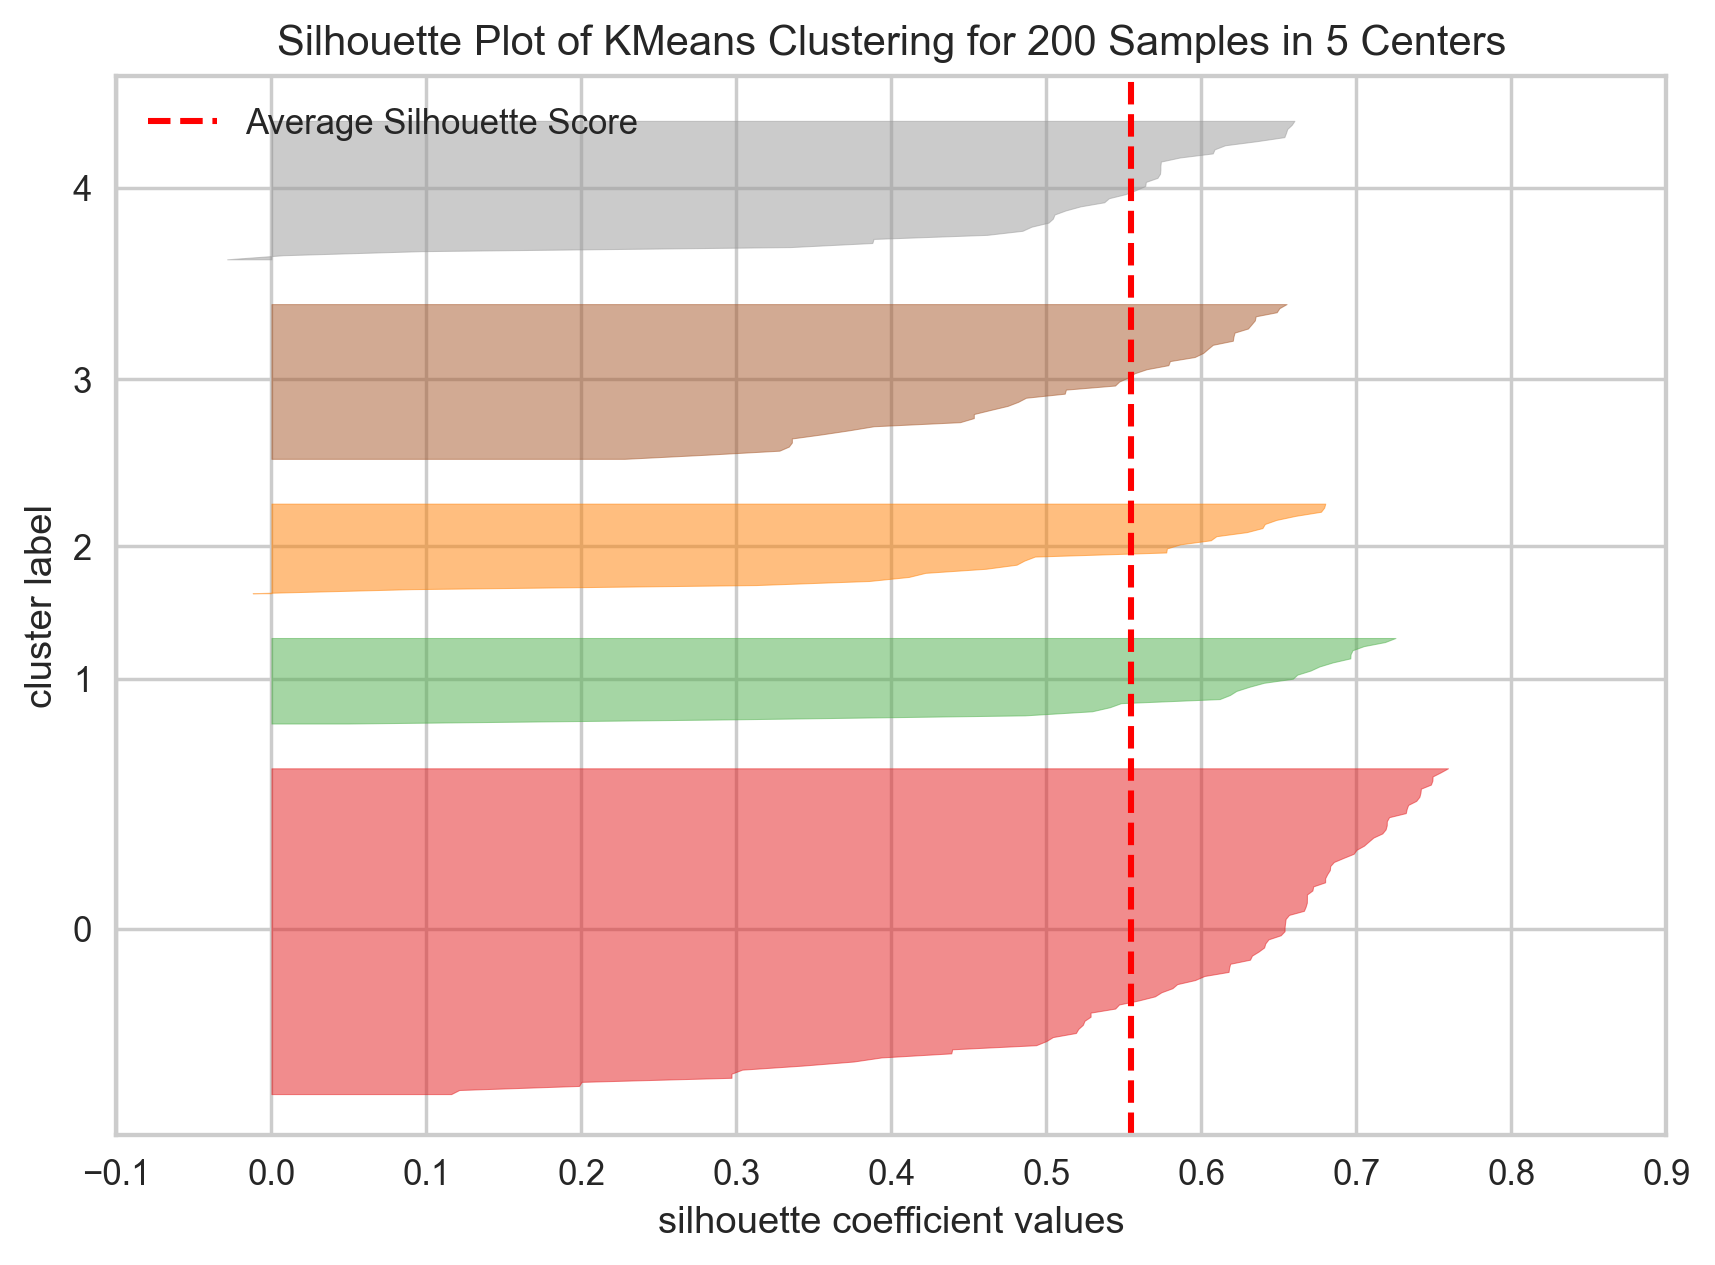

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 200 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [25]:
model = KMeans(n_clusters=5)
vis = SilhouetteVisualizer(model)

vis.fit(x)
vis.show()